# Advanced ML Week 1, Lecture 1: Working with and Preparing Text Data

___

- 12/20/23
- This is a modified version of our in-class notebook from lecture 01 with Twitter Sentiment analysis.
- The dataset has been replaced with a subset of amazon product reviews.

___

### New Sections/Content
- See Prepare-Amazon-Reviews-Subset-csv.ipynb for selection of subset brand.
- [✨Removing HTML with Regex](#regex)
- Data Introduction (below):

### Amazon Data Intro

In [1]:
from IPython.display import display, Markdown
with open("../../Data-AmazonReviews/Amazon Product Reviews.md") as f:
    info = f.read()

display(Markdown(info))

# Amazon Product Reviews

- URL: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews 

## Description

This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews, from around 20 million users.

## Basic statistics

| Ratings:  | 82.83 million        |
| --------- | -------------------- |
| Users:    | 20.98 million        |
| Items:    | 9.35 million         |
| Timespan: | May 1996 - July 2014 |

## Metadata

- reviews and ratings
- item-to-item relationships (e.g. "people who bought X also bought Y")
- timestamps
- helpfulness votes
- product image (and CNN features)
- price
- category
- salesRank

## Example

```
{  "reviewerID": "A2SUAM1J3GNN3B",  "asin": "0000013714",  "reviewerName": "J. McDonald",  "helpful": [2, 3],  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  "overall": 5.0,  "summary": "Heavenly Highway Hymns",  "unixReviewTime": 1252800000,  "reviewTime": "09 13, 2009" }
```

## Download link

See the [Amazon Dataset Page](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/) for download information.

The 2014 version of this dataset is [also available](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html).

## Citation

Please cite the following if you use the data:

**Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering**

R. He, J. McAuley

*WWW*, 2016
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/www16a.pdf)

**Image-based recommendations on styles and substitutes**

J. McAuley, C. Targett, J. Shi, A. van den Hengel

*SIGIR*, 2015
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/sigir15.pdf)

<!-- In this notebook we will be preparing Twitter (X) Tweets for sentiment analysis.  Sentiment analysis is a common text classification challenge to determine whether a text is positive or negative.  

This is useful for companies that want to analyze large numbers of documents, tweets, reviews, etc., to determine public sentiment about a product or service.

The data was originally gathered from Twitter (now X) and hand-labeled.  Of course there will be some human bias in the labeling.  It was downloaded from Kaggle at this site: [Kaggle Twitter Tweets Sentiment Dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset/)

There are 3 classes: positive, negative, and neutral. -->

In [2]:
## Import necessary packages
import pandas as pd
import nltk

# Load the Data

We will load our **corpus** of Amazon Reviews for Hoover products.

In [3]:
df = pd.read_csv('../../Data-AmazonReviews/amazon-reviews-home-kitchen_hoover.csv')
df.head()

,reviewText,summary,overall,brand,title
0,Used it twice already and I have absolutely se...,Not going to show you the dirty water on here ...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
1,When you get the shampooer you have to put it ...,Makes carpet look brand new!!!,5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
2,After getting an estimate on how much it would...,I Got What I Paid For,4.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surg...
3,"I purchased this Hoover carpet cleaner, becaus...","Read tips before use, but overall great product",4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
4,WORKED for maybe 1/2 hr and then it appeared t...,VERY DISAPPOINTED,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150


# Some light EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8257 entries, 0 to 8256
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  8257 non-null   object 
 1   summary     8255 non-null   object 
 2   overall     8257 non-null   float64
 3   brand       8257 non-null   object 
 4   title       8257 non-null   object 
dtypes: float64(1), object(4)
memory usage: 322.7+ KB


In [5]:
# New
df.isna().sum()

reviewText    0
summary       2
overall       0
brand         0
title         0
dtype: int64

In [6]:
df = df.dropna(subset=['reviewText','summary'])
df.isna().sum()

reviewText    0
summary       0
overall       0
brand         0
title         0
dtype: int64

In [7]:
df.duplicated().sum()

64

In [8]:
# New
df = df.drop_duplicates()
df.duplicated().sum()

0

# Some Light Data Cleaning

~~We see that our **corpus** has 27481 **documents**, each with an ID, the full text, a shortened version, and the labeled sentiment.~~

~~Interestingly, one of the tweets has no text!  We definitely want to get rid of that.  We will also drop the `textID` and `selected_text` columns.  We are going to use the entire text of each tweet, not just a subset.~~

~~We will keep the label, `sentiment` for later classification and analysis tasks.~~

### ✨ New Cleaning for Amazon:

- The reviews are split into 2 parts. The reviewText, which is the majority of the review, and the summary, which is a 1-line summary of the review (that often includes the actual rating: e.g., "Fours stars- best vacuum)

In [9]:
df['text-raw'] = df['summary'] + ": " + df['reviewText']
df.head()

,reviewText,summary,overall,brand,title,text-raw
0,Used it twice already and I have absolutely se...,Not going to show you the dirty water on here ...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,Not going to show you the dirty water on here ...
1,When you get the shampooer you have to put it ...,Makes carpet look brand new!!!,5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,Makes carpet look brand new!!!: When you get t...
2,After getting an estimate on how much it would...,I Got What I Paid For,4.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surg...,I Got What I Paid For: After getting an estima...
3,"I purchased this Hoover carpet cleaner, becaus...","Read tips before use, but overall great product",4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,"Read tips before use, but overall great produc..."
4,WORKED for maybe 1/2 hr and then it appeared t...,VERY DISAPPOINTED,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,VERY DISAPPOINTED: WORKED for maybe 1/2 hr and...


#### Confirming Which Columns to Drop

In [10]:
# new
df['brand'].unique()

array(['Hoover'], dtype=object)

In [11]:
# new
df['title'].unique()

array(['Hoover Power Scrub Deluxe Carpet Washer FH50150',
       'Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900',
       'Hoover Linx Cordless Stick Vacuum Cleaner, BH50010'], dtype=object)

In [12]:
df = df.drop(columns=['brand', 'reviewText','summary','title'])
df = df.dropna()

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8256
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   overall   8191 non-null   float64
 1   text-raw  8191 non-null   object 
dtypes: float64(1), object(1)
memory usage: 192.0+ KB


,overall,text-raw
0,4.0,Not going to show you the dirty water on here ...
1,5.0,Makes carpet look brand new!!!: When you get t...
2,4.0,I Got What I Paid For: After getting an estima...
3,4.0,"Read tips before use, but overall great produc..."
4,1.0,VERY DISAPPOINTED: WORKED for maybe 1/2 hr and...


# Some More EDA
Let's look at some aspects of this text.
* What do the **documents** look like?
* How long do the tend to be?

## View some sample tweets

In [14]:
## Expand how many characters pandas will show
pd.set_option('display.max_colwidth', None)

## Display some of the documents (tweets)
df[['text-raw']].head()

,text-raw
0,"Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you're cleaning, if you leave it in place for a second or so (for instance, if you're moving the plug to a new outlet), it will leak a little water out of the part that sucks upward. This isn't a big deal as you will just suck it right back up but if it happens at the end of a cleaning (after you've removed the tanks and whatnot), then you risk having a line where the opening was on your carpet until the next time you use it."
1,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all day...\n\nThe 1st day I got the shampoo I shampooed the entire house and it made a huge difference.\n\nA week later I did the downstairs only Just to get more dirt out of the carpet. The shampoo were made my carpets look Brian knew it took out the stains if left a map it looks great there's scrubbing brushes on the bottom of the thing to kind of scrub the carpet and fluff it up as you're going...\n\nTo shampoo the stairs in furniture it comes with 3 different attachmentsDepending on which one you want to use 1 has a scrubber with the circular motion and the other 2 don't.\n\nMy stairs look brand new after I got done using the attachment.\n\nI definitely recommend the shampooer if you're looking for something to make your carpet amazing.\n\nIt is self propelling and light weight.
2,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, price, and reputation of the maker.\nIt arrived on time, packaging was great (thanks Amazon!) and the cleaner was in brand new-never used condition, just what I ordered. I was a bit concerned about how hard it would be to assemble after reading that some people had a hard time with this. I am not the greatest at putting things together myself, and I agree--the instruction book IS somewhat confusing. (not to mention the tiny type, which makes it very difficult to read)\nWhat I did, and I suggest this to everyone, is to look at the video instructions on YouTube. They are great. I followed those and used the print manual at the same time and did not have a bit of trouble. (but I know I would have not been able to put it together with just the manual alone)\nIt is true,as many have mentioned--the cleaner is totally plastic! The downside of this means parts could break easily I am sure. Plus side of the plastic--it is lightweight and easy to move around. The plastic hopefully won't be as much of an issue for me as this cleaner is not going to be used a lot. We don't have carpet. I got it just to do furniture and a couple of area rugs, and unless there are ""accidents"" don't think I will need to use it very often. Last night I cleaned the sofa and love seat and was amazed at the dirt this cleaner sucked up! (had no idea my dark burgundy furniture was so filthy!) Very easy to attach the appliance used for cleaning upholstry, it got the fabric wet enough to clean it, and sucked up the dirty water very well, so the furniture dried quickly, felt and looked great! (by the way, not a bit of leaking from the tanks, so this was not at all messy for me to operate) It was very late so I only did a portion of an area rug just to test it, and it looks like I will have equally good results there as well. In the future I plan to use it on our ceramic tile porch floor, and as other reviewers have mentioned, am going to try doing that without purchasing the additional ""bare floor"" attachment after reading that yo

In [15]:
# df.loc[df['text'].str.contains('http://')]

We can see here that there are some URLs in the text.  This will be a problem for normalization.  We will remove those.

## Get some statistics on the length of **documents**

Let's see how long each tweet is and determine the average length of tweets

In [16]:
## Determine the length of each tweet
## Create a new column of the lengths of each tweet
df['length']= df['text-raw'].map(len)

In [17]:
## Analyze the statistics of the lengths
df['length'].describe()

count    8191.000000
mean      477.272006
std       606.503639
min        14.000000
25%       124.000000
50%       285.000000
75%       583.000000
max      9509.000000
Name: length, dtype: float64

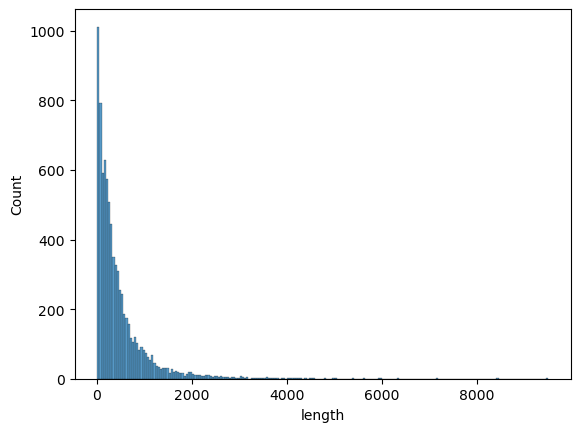

In [18]:
# New 
import seaborn as sns
ax = sns.histplot(data=df, x='length')
# ax.axvline(df['length'].mean(),color='k',ls=':')

<a name='regex'></a>
## ✨ Removing HTML From Reviews with Regex

In [19]:
df.loc[df['text-raw'].str.contains('http://')]

,overall,text-raw,length
1881,4.0,Requires ear protection! I'm not joking. seriously loud.: Requires ear protection. This is way louder and way more shrill than the loudest vacuum cleaner I've owned. With ear plugs in I can still hear it running downstairs when I'm upstairs with two closed doors between there and here. For my wife's protection I have her wearing foam earplugs and her winter earmuffs over that. If I had to use this on a regular basis I'd by professional grade ear protection.\n\nOnce you get past the noise level it works better than the last carpet cleaner we used. We've already seen spots come up with just water only that a previous carpet cleaner didn't bring up with two passes of soap then water only. I can only imagine how well this will work if we actually put soap in it.\n\nConsider http://www.amazon.com/Walkers-Game-Ear-Pro-Low-Camouflage/dp/B00WHTQH90 or http://www.amazon.com/Venture-Gear-26dB-Muff-Pink/dp/B00P7DOWZY or any other earmuff with a 20+ nrr rating and then use earplugs inside the earmuffs.,1001
2890,3.0,"Works well for light duty jobs.: I do not recommend this cleaner for use on noticeably soiled carpets. You may be able to rent a Rug Doctor or the Bissell Big Green Deep Cleaning Machine to tackle the job first, then use this machine for maintenance. Otherwise, no matter how much you use this machine, it will not cut it.\n\nTrust me, I know.\n\nMy house has a light colored carpet, and since it was installed (over 10 years ago), the carpet has been subjected to much abuse by our dogs and unscrupulous care without ever being properly cleaned. I bought the SteamVac to tackle the job, but it was incredibly inadequate. After being continually frustrated, I bought a Bissell Big Green Deep Cleaning Machine. I was amazed at the difference in capability.\n\nSee the below picture for a comparison between the SteamVac and the Big Green Deep Cleaning Machine:\n\nhttp://www.amazon.com/gp/customer-media/permalink/moIZZ3Y26MK2V4/B00450U6CS/ref=cm_ciu_images_pl_link\n\nThe SteamVac just doesn't clean deeply enough.\n\nOther issues I experienced were the solution tank leaking, having the fill and empty both tanks very frequently, and the cord being too short. Also, it would be nice if the dirty tank were large enough to last until the clean tank was empty.\n\nPlus sides of the machine are that it is light and it seems decently reliable considering its breakable feel.\n\nIn summary, I pretty much only recommend this cleaner if your carpets are clean already. It seems like a silly statement, but look at the above picture again for reference.\n\nAlso, for those interested, yes, the Big Green Deep Cleaning Machine is worth the cost. It costs over three times as much as the SteamVac, but it is more than three times the cleaner.",1717
3538,1.0,"Hoover pulled its own support of this product: I bought the Linx at Target two years ago at full price, it worked well until recently when the battery died. A full charge won't last more than 3m. And the battery replacement is as expensive as a new vacuum. To make it worse, you can no longer buy replacement filter from Hoover's website, and it is nowhere to be found on the internet. Note the filter is cheap (I believe it is the main reason Hoover stopped selling it), but it is the most important part of the vacuum, because it maintains air pressure, therefore suction power of the equipment, an improperly designed filter (which is the only thing you can find on website) can cause the vacuum to lose most of its suction - it is exactly what happened to my Linx, the difference is day and night.\n\nhttp://hoover.com/products/details/bh50010/platinum-collection-linx-cordless-stick-vacuum/\n\nTo be fair, the product itself worked like a charm, but I am very disappointed about Hoover's poor product support. If Hoover is so arrogant that it threw a product to the market and then turn a blind eye on its customer, it'd be the last thing I would ever buy from them.",1167
3555,5.0,"DOES 

- Regular expression figured out with Google Bard: https://g.co/bard/share/1db36656cbf3

- Tested out in this saved regex101 pattern: - https://regex101.com/r/01bd7q/3  with the values from below:



In [20]:
# Checking for raw html
df.loc[df['text-raw'].str.contains('<')]

overall  \
15        5.0   
284       4.0   
628       5.0   
768       3.0   
865       5.0   
1336      4.0   
2235      3.0   
2356      5.0   
2379      5.0   
2444      5.0   
2566      5.0   
2910      5.0   
3032      5.0   
3052      4.0   
3106      5.0   
3126      1.0   
3230      5.0   
3843      5.0   
3898      5.0   
3980      5.0   
4091      3.0   
4295      5.0   
4333      5.0   
4465      5.0   
5143      2.0   
5298      4.0   
5458      4.0   
5487      5.0   
5582      5.0   
5627      5.0   
5820      5.0   
5859      5.0   
6087      5.0   
6298      5.0   
6437      4.0   
6800      2.0   
6982      5.0   
7394      5.0   
8006      3.0   
8111      5.0   
8238      1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [21]:
# # Copy/pasted these values into regex 101
# df.loc[df['text-raw'].str.contains('<')]['text-raw'].values

In [22]:
import re

# Regular expression to match HTML tags
regex = r"<[^>]*>"

# Apply the regex to the DataFrame column using str.replace
df['text'] = df['text-raw'].str.replace(regex, '', regex=True)

In [23]:
pd.set_option('display.max_colwidth',250)

In [24]:

df.loc[df['text-raw'].str.contains('<'),['text-raw', 'text']]

,text-raw,text
15,"Great for carpets! Better than the MaxExtract: Got this one for my neighbor who is constantly using mine. This unit is great on carpets, better than the newer and more expensive&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=...","Great for carpets! Better than the MaxExtract: Got this one for my neighbor who is constantly using mine. This unit is great on carpets, better than the newer and more expensive&nbsp;Hoover MaxExtract All-Terrain Carpet Cleaner, F7452900&nbsp;I ..."
284,Lightweight.....: Our carpet had been neglected for a while. We always rented a Rug Doctor and it was becoming quite a hassle to pick it up and return it. Lifting it in and out of our car's trunk was another hassle we wanted to do away with. I p...,Lightweight.....: Our carpet had been neglected for a while. We always rented a Rug Doctor and it was becoming quite a hassle to pick it up and return it. Lifting it in and out of our car's trunk was another hassle we wanted to do away with. I p...
628,"Absolutely love this steam cleaner. SO easy to put together.: <div id=""video-block-R2QK4DAI60IPAP"" class=""a-section a-spacing-small a-spacing-top-mini video-block""></div><input type=""hidden"" name="""" value=""https://images-na.ssl-images-amazon.com/...",Absolutely love this steam cleaner. SO easy to put together.: I purchased this Hoover Power Scrub Carpet Cleaner on Amazon a couple of weeks ago (I THINK) as an Amazon Deal of the Day item. I have been wanting a steam cleaner for years now but ju...
768,"Is my ""new"" Hoover actually used?: <div id=""video-block-R3DIUWMIHK27ME"" class=""a-section a-spacing-small a-spacing-top-mini video-block""></div><input type=""hidden"" name="""" value=""https://images-na.ssl-images-amazon.com/images/I/71LQhZrlvvS.mp4"" c...","Is my ""new"" Hoover actually used?: &nbsp;I received the Hoover F5914 this weekend. I read a few reviews from people who received used machines. When I unpacked the unit, it seemed to have more scratches than one would expect with a new machine...."
865,"This is really a BIG improvement!: Hoover LiNX Cordless Stick Vac (Model BH50010) List $179.99 (3/17/09)\n\nPros:\nCleans well - on/off brushroll for bare floors or area rugs/carpeting, excellent on pet hair\nControl on handle - easy to use\nChar...","This is really a BIG improvement!: Hoover LiNX Cordless Stick Vac (Model BH50010) List $179.99 (3/17/09)\n\nPros:\nCleans well - on/off brushroll for bare floors or area rugs/carpeting, excellent on pet hair\nControl on handle - easy to use\nChar..."
1336,Cheaper than a pro and just as good: Hoover arrived in a timely manner and re-packaged well After opening ..handle assembly was missing the screws Amazon refunded $10.00 for the hassle and i went to my local hardware store and picked them up for ...,Cheaper than a pro and just as good: Hoover arrived in a timely manner and re-packaged well After opening ..handle assembly was missing the screws Amazon refunded $10.00 for the hassle and i went to my local hardware store and picked them up for ...
2235,"Great For The Few Hours It Lasted: <div id=""video-block-R1L51WJ0A440RZ"" class=""a-section a-spacing-small a-spacing-top-mini video-block""></div><input type=""hidden"" name="""" value=""https://images-na.ssl-images-amazon.com/images/I/91YRGqmgsLS.mp4"" c...","Great For The Few Hours It Lasted: &nbsp;I loved this machine the first time I used it. That was on Friday afternoon, on the bedroom rug, which was a lot filthier than I could've imagined. We have two dogs. One is very old and prone to accidents,..."
2356,Has gotten me out of a LOT of stains: I've bought multiple of these in the past few years. A couple as gifts and one for myself. Everyone who received one from me loves it. I've personally used it often enough to justify the purchase. I actually ...,Has gotten me out of a LOT of stains: I've bought multiple of these in the past few years. A couple as gifts and one for myself. Everyone who received o

# Text Normalization with NLTK

## Normalizing Casing

It's common practice to lower the casing of the text in our documents to contribut to normalizing.

In [25]:
## Lower the casing of each document
df['lower_text'] = df['text'].str.lower()
df.head()

,overall,text-raw,length,text,lower_text
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri..."
3,4.0,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I really like this carpet cleaner, and it really helped my poor tan colored carpet. I have a dog, two cats, toddl...",995,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I really like this carpet cleaner, and it really helped my poor tan colored carpet. I have a dog, two cats, toddl...","read tips before use, but overall great product: i purchased this hoover carpet cleaner, because of all the great reviews on here. i really like this carpet cleaner, and it really helped my poor tan colored carpet. i have a dog, two cats, toddl..."
4,1.0,VERY DISAPPOINTED: WORKED for maybe 1/2 hr and then it appeared the motor got hot and shut off and 10 secs later would start again and would work for 10 or 15 secs and quit again.......sending it back to HOOVER this week......I was VERY DISAPPOIN...,311,VERY DISAPPOINTED: WORKED for maybe 1/2 hr and then it appeared the motor got hot and shut off and 10 secs later would start again and would work for 10 or 15 secs and quit again.......sending it back to HOOVER this week......I was VERY DISAPPOIN...,very disappointed: worked for maybe 1/2 hr and then it appeared the motor got hot and shut off and 10 secs later would start again and would work for 10 or 15 secs and quit again.......sending it back to hoover this week......i was very disappoin...


## Tokenizing

Tokenizing text into single word tokens is simple in Python.  We can just use `str.split()`.  The default separator for `.split()` is one space, so `' '`.

We can access Pandas' string accessor with `df.str.<method>`.  This allows us to apply string methods to all rows in a column.

When processing text, if memory allows, it can be useful to keep many versions of your text: tokenize, lemmatized, no stop words, etc.  Some analysis or modeling packages expect tokenized data and others do not.  We often want to use different versions for different kinds of analysis, too.

In [26]:
## Split the documents into tokens

df['tokens'] = df['lower_text'].str.split()
df.head()

,overall,text-raw,length,text,lower_text,tokens
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ...:, used, it, twice, already, and, i, have, absolutely, seen, results., not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, ..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new!!!:, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy...the, handle, is, the, only, thing, that, you, have, to, attach..., my, carpets, were, very, dirty, because, i, have, 2, ..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri...","[i, got, what, i, paid, for:, after, getting, an, estimate, on, how, much, it, would, cost, to, have, a, ""professional"", clean, our, sofa, &, love, seat, i, decided, to, do, it, myself,, so, purchased, this, cleaner., i, chose, this, hoover, base..."
3,4.0,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I really like this carpet cleaner, and it really helped my poor tan colored carpet. I have a dog, two cats, toddl...",995,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I really like this carpet cleaner, and it really helped my poor tan colored carpet. I have a dog, two cats, toddl...","read tips before use, but overall great product: i purchased this hoover carpet cleaner, because of all the great reviews on here. i really like this carpet cleaner, and it really helped my poor tan colored carpet. i have a dog, two cats, toddl...","[read, tips, before, use,, but, overall, great, product:, i, purchased, this, hoover, carpet, cleaner,, because, of, all, the, great, reviews,

### Better way to tokenize data

NLTK has a more sophisticated tokenization function that will isolate things like punctuation as well.  This way 'hooray' and 'hooray!!!' will be the same token.

In order for NLTK to recognize the punctuation, we will need to download the 'punkt' data.

In [27]:
## Download punkt
nltk.download('punkt')

## Tokenize with nltk.word_tokenize instead

df['tokens'] = df['lower_text'].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,overall,text-raw,length,text,lower_text,tokens
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri...","[i, got, what, i, paid, for, :, after, getting, an, estimate, on, how, much, it, would, cost, to, have, a, ``, professional, '', clean, our, sofa, &, love, seat, i, decided, to, do, it, myself, ,, so, purchased, this, cleaner, ., i, chose, this, ..."
3,4.0,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I really like this carpet cleaner, and it really helped my poor tan colored carpet. I have a dog, two cats, toddl...",995,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I really like this carpet cleaner, and it really helped my poor tan colored carpet. I have a dog, two cats, toddl...","read tips before use, but overall great product: i purchased this hoover carpet cleaner, because of all the great reviews on here. i really like this carpet cleaner, and it really helped my poor tan colored carpet. i have a dog, two cats, toddl...","[read, tips, before, use, ,, but, overall, great, product, :, i, purchased, this, hoover, carpet, cleaner, ,, because, of, all, the, great, revi

## Remove Stop Words

In [28]:
## Download NLTK stopword list
nltk.download('stopwords')

## Load the English stop words.

stop_words = nltk.corpus.stopwords.words('english')
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

<font color=red> NOTICE </font> that all of the stop words are lower case.  It's necessary to ensure that your tokens are all lower case before using this list to remove stop words.

To remove the stop words from each document, we will apply a function that will check each word in the list of tokens against the list of stopwords and remove them if they are in the list.  More specifically, it will only save them if they are NOT in the list.

In [29]:
## Create function to remove stop words
def remove_stopwords(tokens):
    # no_stops = []
    # for token in tokens:
    #     if token not in stop_words:
    #         no_stops.append(token)

    no_stops = [token for token in tokens if token not in stop_words]
    
    return no_stops
    
## Apply the function to the tokenized data

df['no_stops'] = df['tokens'].map(remove_stopwords)
df.head(10)




,overall,text-raw,length,text,lower_text,tokens,no_stops
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri...","[i, got, what, i, paid, for, :, after, getting, an, estimate, on, how, much, it, would, cost, to, have, a, ``, professional, '', clean, our, sofa, &, love, seat, i, decided, to, do, it, myself, ,, so, purchased, this, cleaner, ., i, chose, this, ...","[got, paid, :, getting, estimate, much, would, cost, ``, professional, '', clean, sofa, &, love, seat, decided, ,, purchased, cleaner, ., chose, hoover, based, many, amazon, reviews, read, ,, price, ,, reputation, maker, ., arrived, time, ,, pack..."
3,4.0,"Read tips before use, but overall great product: I purchased this Hoover carpet cleaner, because of all the great reviews on here. I 

## Remove Punctuation

We can remove punctuation in a similar that we removed stop words.  However, we will get our list of punctuation from the built in Python string library.

In [30]:
## Import built-in String Libary
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
## Create function to remove punctuation tokens

def remove_punct(tokens):
    no_punct = []
    for token in tokens:
        if token not in punctuation:
            no_punct.append(token)
    return no_punct

## Apply the function to the tokens without punctuation

df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)
df.head(10)

,overall,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li...","[going, show, dirty, water, shame, ..., used, twice, already, absolutely, seen, results, going, show, dirty, water, shame, gross, say, 're, cleaning, leave, place, second, instance, 're, moving, plug, new, outlet, leak, little, water, part, sucks..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w...","[makes, carpet, look, brand, new, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, week, later, dow..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri...","[i, got, what, i, paid, for, :, after, getting, an, estimate, on, how, much, it, would, cost, to, have, a, ``, profession

## Remove URLs

In [32]:
## [v3 For Loop - Continue] Define function to remove URLs
def remove_urls(token_list):
    no_urls = []
    for token in token_list:
        if ('http' in token) | ('www' in token):
            continue
        no_urls.append(token)
    return no_urls

## Remove URLs from no_stops_no_punct
df['no_stops_no_punct'] = df['no_stops_no_punct'].apply(remove_urls)
df.head(10)


,overall,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li...","[going, show, dirty, water, shame, ..., used, twice, already, absolutely, seen, results, going, show, dirty, water, shame, gross, say, 're, cleaning, leave, place, second, instance, 're, moving, plug, new, outlet, leak, little, water, part, sucks..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w...","[makes, carpet, look, brand, new, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, week, later, dow..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri...","[i, got, what, i, paid, for, :, after, getting, an, estimate, on, how, much, it, would, cost, to, have, a, ``, profession

## Results

Note how many fewer tokens we have in our `no_stops_no_punct` tokens than in our original.  However, some information was lost, but a lot was also retained.  

Normalization is a huge part of the NLP process and is always a balance between reducing the size of our vocabulary and therefor simplifying our models, and retaining enough information for the model to extract some meaningful patterns in the texts.  

There are a lot of choices here to make.

# Normalizing Text with spaCy

The spaCy Python package provides text processing pipelines that can do many of these operations, plus much more complicated processing, very fast and in many fewer steps.  For this reason it is a very popular tool.  

It utilizes pretrained language models that can recognize things like parts of speech and named entities (people, specific places, currency, etc.)

spaCy was not included in your original dojo_env, so you will need to install if if you have not already.

We will also download the pretrained english language model trained on millions of web documents.  We will use the small sized one for efficiency.

In [33]:
## Install spacy if necessary
#!pip install spacy

import spacy

## Download the English small-sized model trained on web documents if necessary
# spacy.cli.download('en_core_web_sm')

## The spaCy model

In [34]:
## Load the model.  Disable Named Entity Recognizer (too slow)
nlp_model = spacy.load('en_core_web_sm', disable='ner')

## Display the names of each tranformer pipe
nlp_model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']

We have our model, and we can apply it like a function.  It expects a string of text as the input.

In [35]:
df.head()

,overall,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li...","[going, show, dirty, water, shame, ..., used, twice, already, absolutely, seen, results, going, show, dirty, water, shame, gross, say, 're, cleaning, leave, place, second, instance, 're, moving, plug, new, outlet, leak, little, water, part, sucks..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w...","[makes, carpet, look, brand, new, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, week, later, dow..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...","i got what i paid for: after getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat i decided to do it myself, so purchased this cleaner. i chose this hoover based on the many amazon reviews i read, pri...","[i, got, what, i, paid, for, :, after, getting, an, estimate, on, how, much, it, would, cost, to, have, a, ``, profession

In [36]:
# New
idx_example = 286#2873
raw_text = df.loc[idx_example,'text']
raw_text

'Five Stars: works well.'

In [37]:
## Process a document with the model
doc = nlp_model(raw_text)
doc

Five Stars: works well.

The document is a collection of tokens we can iterate over

## Documents and Tokens

In [38]:
## Display the tokens in the document

[token for token in doc]

[Five, Stars, :, works, well, .]

Each token is much more than a string.  It

In [39]:
## Isolate the last token in the document
doc = nlp_model("I thought I did my homework but I forgot I was running late and didn't finish.")
word = doc[-4]

## Display the text and type of the token
print(word)
type(word)

did


spacy.tokens.token.Token

Each has many attributes that we can take advantage of, such as the lemma form and whether it is punctuation or space, and whether it is a stop word

In [40]:
## Display the lemmatized form of the token

word.lemma_

'do'

In [41]:
## Check whether the token is punctuation
word.is_punct


False

In [42]:
## Check whether the token is a space
word.is_space

False

Spacy can even determine the part of speech that the token is!

In [43]:
## Check the part of speech of the token
word.pos_

'AUX'

In [44]:
## Show the parts of speech for each token in the document

[token.pos_ for token in doc]

['PRON',
 'VERB',
 'PRON',
 'VERB',
 'PRON',
 'NOUN',
 'CCONJ',
 'PRON',
 'VERB',
 'PRON',
 'AUX',
 'VERB',
 'ADV',
 'CCONJ',
 'AUX',
 'PART',
 'VERB',
 'PUNCT']

In [45]:
## Show a list of the lemmas for each token in the document

[token.lemma_ for token in doc]

['I',
 'think',
 'I',
 'do',
 'my',
 'homework',
 'but',
 'I',
 'forget',
 'I',
 'be',
 'run',
 'late',
 'and',
 'do',
 'not',
 'finish',
 '.']

Notice that spaCy does not lower the case of lemmas.  Let's make sure we do that, too.

In [46]:
## Show a list of only the tokens in the document that are not punctuation or spaces or URLs
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue
    if token.is_stop:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list


['think', 'homework', 'forget', 'run', 'late', 'finish']

In [47]:
## Show a list of all the tokens in the document that are not punctuation, spaces, or stop words
[token.lemma_.lower() for token in doc if 
 not token.is_punct and 
 not token.is_space and 
 not token.is_stop]

['think', 'homework', 'forget', 'run', 'late', 'finish']

In order to use spaCy to process our entire dataframe, we will need to make a function and apply it to our text column.

In [48]:
## Let's also remove URLs
## Let's also remove the url
[token.lemma_.lower() for token in doc if 
 not token.is_punct and 
 not token.is_space and 
 not token.is_stop and 
 not 'http' in token.lemma_.lower() and
 not 'www' in token.lemma_.lower()]

['think', 'homework', 'forget', 'run', 'late', 'finish']

## Preprocessing with spaCy

In [49]:
## Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() 
                         for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

## process the tweets using the spacy function
df['spacy_lemmas'] = df['text'].apply(spacy_process)
df.head()

,overall,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct,spacy_lemmas
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li...","[going, show, dirty, water, shame, ..., used, twice, already, absolutely, seen, results, going, show, dirty, water, shame, gross, say, 're, cleaning, leave, place, second, instance, 're, moving, plug, new, outlet, leak, little, water, part, sucks...","[go, dirty, water, shame, twice, absolutely, see, result, go, dirty, water, shame, gross, clean, leave, place, second, instance, move, plug, new, outlet, leak, little, water, suck, upward, big, deal, suck, right, happen, end, cleaning, remove, ta..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w...","[makes, carpet, look, brand, new, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, week, later, dow...","[make, carpet, look, brand, new, shampooer, easy, handle, thing, attach, carpet, dirty, 2, small, dog, hour, day, 1st, day, get, shampoo, shampoo, entire, house, huge, difference, week, later, downstair, dirt, carpet, shampoo, carpet, look, brian..."
2,4.0,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean our sofa & love seat I decided to do it myself, so purchased this cleaner. I chose this Hoover based on the many Amazon reviews I read, pri...",3016,"I Got What I Paid For: After getting an estimate on how much it would cost to have a ""professional"" clean ou

We used spaCy to tokenize, lemmatize, and remove punctuation and stopwords from our text in one step!

Notice that the spaCy processed data is a little different than our previously processed data.  The text has been lemmatized and spaCy has a different list of stop words than NLTK.

The learn platform has directions for how you can customize your spaCy stopword list and a function with more flexibility in how spaCy will process your data.

# ngrams
combine multiple words into tokens

In [50]:
## Import the ngrams function
from nltk import ngrams

In [51]:

## Isolate the 6th lemmatized document


In [52]:

# Create list of bigrams


In [53]:

# Create list of trigrams



## Applying `ngrams` to make a new column



We need to make a function that returns a list of bigrams.  It won't work to just pass the ngrams function to `.apply()`


In [54]:
## Create a function to create bigrams
def make_bigrams(doc):
    bigrams = ngrams(doc, 2)
    bigrams = list(bigrams)
    return bigrams

In [55]:
# add bigrams to the df with .apply()
df['bigrams'] = df['spacy_lemmas'].apply(make_bigrams)
df.head()

,overall,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct,spacy_lemmas,bigrams
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li...","[going, show, dirty, water, shame, ..., used, twice, already, absolutely, seen, results, going, show, dirty, water, shame, gross, say, 're, cleaning, leave, place, second, instance, 're, moving, plug, new, outlet, leak, little, water, part, sucks...","[go, dirty, water, shame, twice, absolutely, see, result, go, dirty, water, shame, gross, clean, leave, place, second, instance, move, plug, new, outlet, leak, little, water, suck, upward, big, deal, suck, right, happen, end, cleaning, remove, ta...","[(go, dirty), (dirty, water), (water, shame), (shame, twice), (twice, absolutely), (absolutely, see), (see, result), (result, go), (go, dirty), (dirty, water), (water, shame), (shame, gross), (gross, clean), (clean, leave), (leave, place), (place..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w...","[makes, carpet, look, brand, new, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, week, later, dow...","[make, carpet, look, brand, new, shampooer, easy, handle, thing, attach, carpet, dirty, 2, small, dog, hour, day, 1st, day, get, shampoo, shampoo, entire, house, huge, difference, week, later, downstair, dirt, carpet, shampoo, carpet, look, brian...","[(make, carpet), (carpet, look), (look, brand), (brand, new), (new, shampooer), (shampooer, easy), (easy, handle),


# Save the final data version for modeling


In [56]:
df.head()

,overall,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct,spacy_lemmas,bigrams
0,4.0,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,672,Not going to show you the dirty water on here because I have shame and it ...: Used it twice already and I have absolutely seen results. Not going to show you the dirty water on here because I have shame and it is gross. I will say that while you...,not going to show you the dirty water on here because i have shame and it ...: used it twice already and i have absolutely seen results. not going to show you the dirty water on here because i have shame and it is gross. i will say that while you...,"[not, going, to, show, you, the, dirty, water, on, here, because, i, have, shame, and, it, ..., :, used, it, twice, already, and, i, have, absolutely, seen, results, ., not, going, to, show, you, the, dirty, water, on, here, because, i, have, sha...","[going, show, dirty, water, shame, ..., :, used, twice, already, absolutely, seen, results, ., going, show, dirty, water, shame, gross, ., say, 're, cleaning, ,, leave, place, second, (, instance, ,, 're, moving, plug, new, outlet, ), ,, leak, li...","[going, show, dirty, water, shame, ..., used, twice, already, absolutely, seen, results, going, show, dirty, water, shame, gross, say, 're, cleaning, leave, place, second, instance, 're, moving, plug, new, outlet, leak, little, water, part, sucks...","[go, dirty, water, shame, twice, absolutely, see, result, go, dirty, water, shame, gross, clean, leave, place, second, instance, move, plug, new, outlet, leak, little, water, suck, upward, big, deal, suck, right, happen, end, cleaning, remove, ta...","[(go, dirty), (dirty, water), (water, shame), (shame, twice), (twice, absolutely), (absolutely, see), (see, result), (result, go), (go, dirty), (dirty, water), (water, shame), (shame, gross), (gross, clean), (clean, leave), (leave, place), (place..."
1,5.0,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,1021,Makes carpet look brand new!!!: When you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n My carpets were very dirty because I have 2 small dogs that go in and hour all d...,makes carpet look brand new!!!: when you get the shampooer you have to put it together but is very easy...the handle is the only thing that you have to attach...\n\n my carpets were very dirty because i have 2 small dogs that go in and hour all d...,"[makes, carpet, look, brand, new, !, !, !, :, when, you, get, the, shampooer, you, have, to, put, it, together, but, is, very, easy, ..., the, handle, is, the, only, thing, that, you, have, to, attach, ..., my, carpets, were, very, dirty, because...","[makes, carpet, look, brand, new, !, !, !, :, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, ., w...","[makes, carpet, look, brand, new, get, shampooer, put, together, easy, ..., handle, thing, attach, ..., carpets, dirty, 2, small, dogs, go, hour, day, ..., 1st, day, got, shampoo, shampooed, entire, house, made, huge, difference, week, later, dow...","[make, carpet, look, brand, new, shampooer, easy, handle, thing, attach, carpet, dirty, 2, small, dog, hour, day, 1st, day, get, shampoo, shampoo, entire, house, huge, difference, week, later, downstair, dirt, carpet, shampoo, carpet, look, brian...","[(make, carpet), (carpet, look), (look, brand), (brand, new), (new, shampooer), (shampooer, easy), (easy, handle),

In [57]:

## Save the processed data
df.to_csv('../../Data-AmazonReviews/processed_data.csv', index=False)

In [58]:
# # Save the processed data
import joblib

joblib.dump(df, '../../Data-AmazonReviews/processed_data.joblib')

['../../Data-AmazonReviews/processed_data.joblib']